# 1.Для чего нужно понятие стационарности в анализе временных рядов?

Ряд является стационарным, если статистические характеристики не изменяются с течением времени. 
То есть наблюдается постоянство дисперсии и матожидание значений, а также ковариационная функция зависит только 
от растояний между наблюдениями. В этом случае, строить прогноз гораздо проще, ибо у нас есть предположение, что статистические характеристики будут в будущем такими же. Тот же МНК работает только со стационарными рядами.

# 2. Рассмотрите картинку data/images/ts_types.png. 



a. Назовите ряды с гетероскедастичностью? i

b. Какие ряды имеют сезонность? g,h


с. Какие ряды имеют цикличность? c,d


d. Какие ряды можно приблизить моделью интегрированного ряда? a (График Доу-Джонса за 300 дней просто не может иметь цикличности, это я, как инвестор с 1994 года знаю. )) ) ,e,f


e. Какие ряды можно считать стационарными? b

# 3.Рассмотрите один из графиков индекса Доу-Джонса 
(data/dataset/dow_jones.csv). Предположим, вы можете сделать только одно 
преобразование ряда, чтобы сделать его стационарным. Какое 
преобразование вы выберете и почему? Сделайте это преобразование, 
проверьте, получили ли вы белый шум.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics import tsaplots
from statsmodels.stats import diagnostic
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import scipy

from load_dataset import Dataset
import plotting

In [2]:
dataset = Dataset('C:/Users/volos/Documents/GitHub/ts_autumn/data/dataset/')

In [3]:
ts = dataset['dow_jones_0.csv']

<AxesSubplot:xlabel='2018-11-30'>

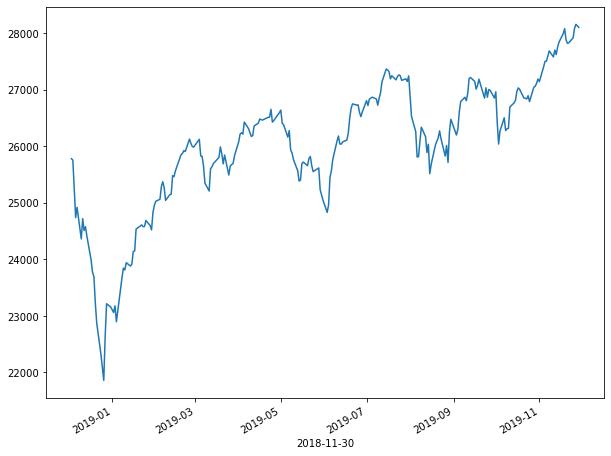

In [4]:
ts.plot(figsize=(10, 8))

Это график биржевого индекса, причем за год. Следовательно, никаких циклов и сезонности быть не может. Прослеживается повышательный тренд, следовательно, самый простой способ привести к стационарному ряду - провести дифференцирование с лагом 1.

In [5]:
ts_diff = ts.diff()

<AxesSubplot:xlabel='2018-11-30'>

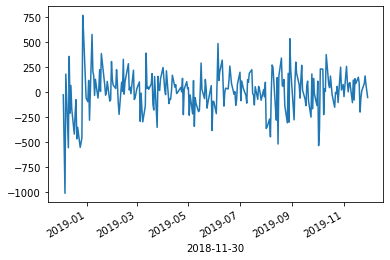

In [6]:
ts_diff.plot()

График автокорреляции полученного в результате дифференцирования ряда подтверждает отсутствие сезонности

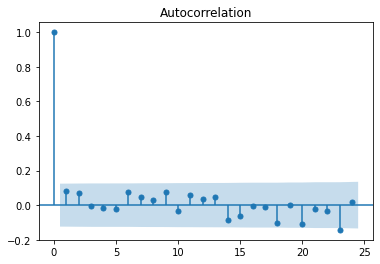

In [7]:
tsaplots.plot_acf(ts_diff.dropna());

In [8]:
_, p_value = diagnostic.acorr_ljungbox(ts_diff.dropna(), lags=70,return_df=False)
print(min(p_value), max(p_value))
print(adfuller(ts_diff.dropna())[1])

0.19286493164388577 0.9416770711265334
7.270680965724108e-27


Критерий Дики-Фуллера показывает, что ряд стационарный. Тест Ланга-Бокса показывает, что получившийся данные имеют случайный характер. 
Следовательно, ряд является белым шумом.

# 4. Рассмотрите ряд data/dataset/stl_example.csv.
Постройте для него график автокорреляций. Обьясните закономерности, которые вы видите.

In [9]:
ts = dataset['stl_example.csv']

<AxesSubplot:>

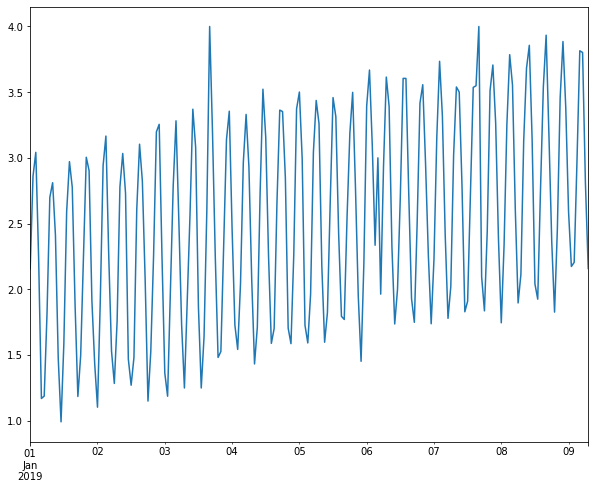

In [10]:
ts.plot(figsize=(10, 8))

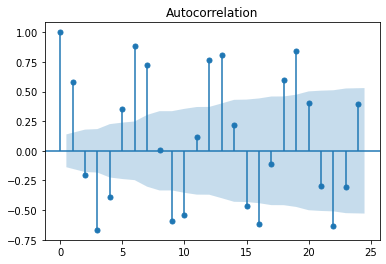

In [11]:
tsaplots.plot_acf(ts);

Исходя из самого графика, мы видим линейный повышательный тренд, стабильную дисперсию и явную сезонную компоненту. График автокорреляции показывает сезонность с лагом 6 и дополнительную с лагом 1.

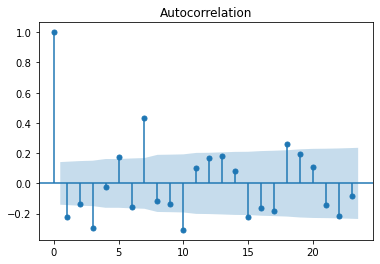

In [12]:
tsaplots.plot_acf(ts.diff(6).diff().dropna());

График автокорреляции продифференцированного ряда подтверждает данную гипотезу.

# 5.написать функцию get_seasonal_period(), которая бы автоматически определяла период сезонных временных рядов, используя автокорреляционную функцию. 

In [22]:
from statsmodels.tsa.stattools import acf

In [25]:
def get_seasonal_period(ts: pd.Series, significance = 0.7):  
    #  significance - уровень корреляционной связи, который ищем
    
    # удаляем тренд
    k,b = np.polyfit(range(len(ts)),ts.values,1)
    trend = pd.Series(k*np.array(range(len(ts)))+b,ts.index)
    ts_dropna = (ts-trend).dropna()    
    if max(acf(ts_dropna, fft =False)[1:]) >= significance:
        return list(acf(ts_dropna, fft =False)).index(max(acf(ts_dropna, fft =False)[1:]))
    return None

In [26]:
get_seasonal_period(ts)

6